In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import IPython.display as ipd
import librosa 
import librosa.display
import numpy as np

# Librosa in my language
>librosa convert any wave signal into single dimansion and also normalization.

>This plot made by only single wave single

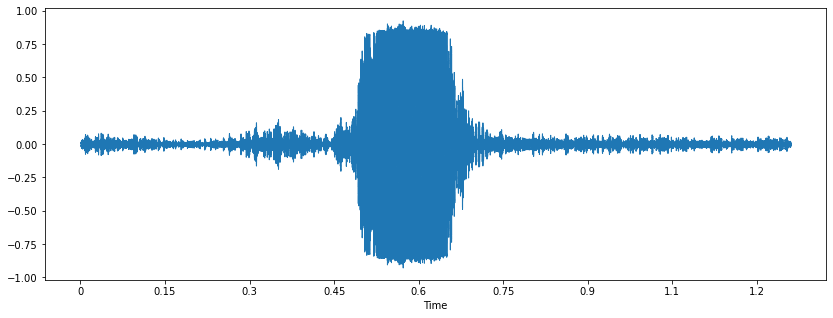

In [3]:
# single sample data 
filename = "D:/UrbanSound8K/dog.wav"
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

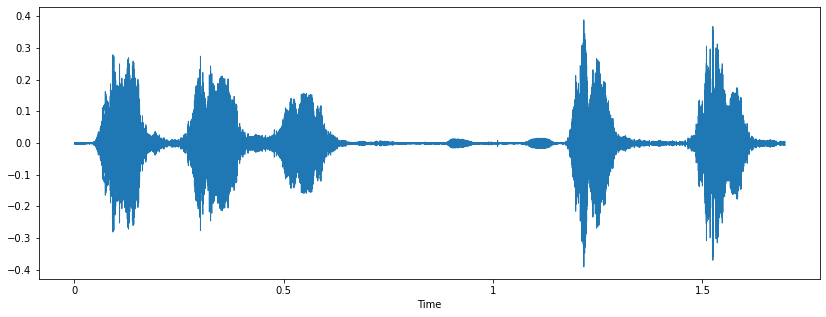

In [4]:
filename = "D:/UrbanSound8K/dogs.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

This is librosa audio_loadfile data and this is single dimension and normalization data

In [5]:
data

array([ 0.00100781,  0.00144764,  0.00136519, ..., -0.00425284,
       -0.0061661 ,  0.        ], dtype=float32)

In [6]:
sample_rate

22050

This is scipy reading audio file and This is not single chennel scipy gave us 2d array data


In [7]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[   1,   88],
       [   1,   89],
       [  -5,   93],
       ...,
       [-217, -153],
       [-255, -138],
       [-286, -121]], dtype=int16)

In [10]:
import pandas as pd
dataset  = pd.read_csv("D:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")
dataset.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [11]:
dataset["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Data Preprocessing

In [12]:
audio_file_path = "D:/UrbanSound8K/14780-9-0-0.wav"
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_path)

In [13]:
print(librosa_audio_data)

[-0.00449995  0.00749012  0.02265031 ...  0.02106324  0.0421663
  0.00018579]


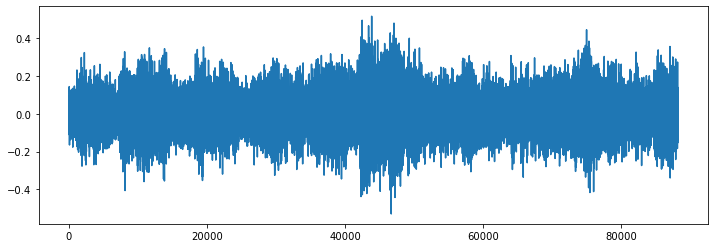

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [15]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(audio_file_path)

In [16]:
wave_audio

array([[ 1080,   585],
       [  178, -1492],
       [-1618,   456],
       ...,
       [ 1530,    18],
       [   45,  -910],
       [ -406,   110]], dtype=int16)

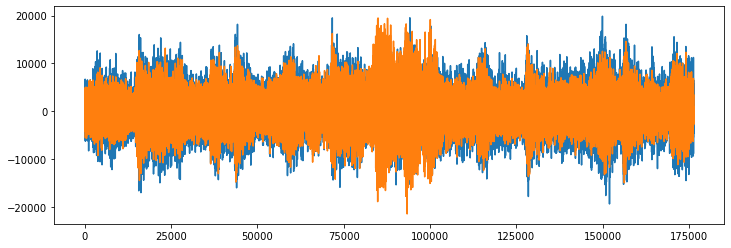

In [17]:
#orignalwith  two channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [18]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [19]:
mfccs

array([[-1.35498840e+02, -1.01407028e+02, -8.35182571e+01, ...,
        -4.38174858e+01, -4.33814316e+01, -6.87783356e+01],
       [ 7.19452972e+01,  7.03211823e+01,  7.26905136e+01, ...,
         6.35985107e+01,  7.30422592e+01,  7.91604691e+01],
       [ 7.37606704e-01,  3.43435097e+00,  2.14661622e+00, ...,
        -2.67289314e+01, -3.09904366e+01, -3.15720749e+01],
       ...,
       [ 5.61104012e+00,  4.15391636e+00,  1.12309694e-01, ...,
        -2.46771097e+00, -3.27353895e-01, -1.11478007e+00],
       [ 5.44001698e-01, -1.25709128e+00,  1.06781721e-02, ...,
        -1.11911049e+01, -5.33193350e+00, -4.42402363e-02],
       [ 2.80302763e+00,  6.23074245e+00,  8.23700047e+00, ...,
         3.85080314e+00,  2.28223491e+00,  1.41178453e+00]], dtype=float32)

In [20]:
mfccs_scaled_feature = np.mean(mfccs.T,axis = 0)
mfccs_scaled_feature

array([-68.45368   ,  71.53659   , -14.419421  ,  -2.018065  ,
        -0.14108828,   0.29246873, -12.865934  ,  -2.8357377 ,
       -15.4594755 ,   3.4613295 , -12.942112  ,   6.7613597 ,
       -10.597476  ,   8.372566  , -14.556991  ,   2.7233367 ,
       -12.807623  ,   2.9697177 ,  -5.5101995 ,   8.764791  ,
        -6.1072893 ,  -2.2084386 , -14.0333805 ,  -2.8556764 ,
       -10.284458  ,   4.229218  ,  -3.2989538 ,   5.338967  ,
        -6.4500966 ,   0.2758233 ,  -6.557613  ,   3.2170541 ,
        -6.0978208 ,   0.31799906,  -8.594823  ,   1.1941028 ,
        -3.681326  ,   2.1673708 ,  -5.627293  ,  -1.1986328 ],
      dtype=float32)

In [21]:
audio_dataset_path = "D:/UrbanSound8K/UrbanSound8K/audio/"
dataset

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [1]:
def feature_extractor(file):
    # First we do librosa.load This gave us two output audio,sample rate
    # Then we do mfcc and transpose it 
    audio,sample_rate = librosa.load(file,res_type="kaiser_fast")
    mfccs_feature = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs_feature.T,axis = 0)
    return mfccs_scaled_feature

In [23]:
file = "D:/UrbanSound8K/dogs.wav"
audio,sample_rate = librosa.load(file,res_type='kaiser_fast')
print(audio,"This is sample_rate : ",sample_rate)
mfccs_feature = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
print("This is mfccs_feature",mfccs_feature.shape)
mfccs_scaled_feature = np.mean(mfccs_feature.T,axis = 0)
print("This is mfcc_scaled_featuer",mfccs_scaled_feature.shape)

[ 0.00097059  0.00147311  0.00135583 ... -0.00425908 -0.00620399
  0.        ] This is sample_rate :  22050
This is mfccs_feature (40, 74)
This is mfcc_scaled_featuer (40,)


In [24]:
from tqdm import tqdm
import os
## Now we iterate throught every audio file and extract feature
## using mel-frequency cepstral coefficient
extracted_feature = []
for index_num,row in tqdm(dataset.iterrows()):
    filename = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    #print("THis is file path : ",filename)
    final_class_labels = row['class']
    data = feature_extractor(filename)
    #print("this is after feature_extractor",data)
    extracted_feature.append([data,final_class_labels])

3554it [04:19, 13.56it/s]C:\Users\uvais\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [10:28, 23.09it/s]C:\Users\uvais\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\uvais\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [10:55, 13.33it/s]


In [25]:
# this is how filename join and iterate
for index_num,row in tqdm(dataset.iterrows()):
    filename = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    print(row)

281it [00:00, 1416.26it/s]

slice_file_name    100032-3-0-0.wav
fsID                         100032
start                           0.0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      dog_bark
Name: 0, dtype: object
slice_file_name    100263-2-0-117.wav
fsID                           100263
start                            58.5
end                              62.5
salience                            1
fold                                5
classID                             2
class                children_playing
Name: 1, dtype: object
slice_file_name    100263-2-0-121.wav
fsID                           100263
start                            60.5
end                              64.5
salience                            1
fold                                5
classID                             2
class                children_playing
Name: 2, dtype: object
slice_file_name    100263-2-0-126.w

740it [00:00, 1504.04it/s]

slice_file_name    105289-8-0-2.wav
fsID                         105289
start                      27.31554
end                        31.31554
salience                          2
fold                              7
classID                           8
class                         siren
Name: 423, dtype: object
slice_file_name    105289-8-0-3.wav
fsID                         105289
start                      27.81554
end                        31.81554
salience                          2
fold                              7
classID                           8
class                         siren
Name: 424, dtype: object
slice_file_name    105289-8-0-4.wav
fsID                         105289
start                      28.31554
end                        32.31554
salience                          2
fold                              7
classID                           8
class                         siren
Name: 425, dtype: object
slice_file_name    105289-8-0-5.wav
fsID                     

1236it [00:00, 1547.55it/s]

slice_file_name    118440-4-7-0.wav
fsID                         118440
start                      8.195748
end                         8.61258
salience                          1
fold                              5
classID                           4
class                      drilling
Name: 917, dtype: object
slice_file_name    118440-4-8-0.wav
fsID                         118440
start                      8.794578
end                        9.270119
salience                          1
fold                              5
classID                           4
class                      drilling
Name: 918, dtype: object
slice_file_name    118496-1-0-0.wav
fsID                         118496
start                      1.394779
end                        1.649762
salience                          2
fold                              3
classID                           1
class                      car_horn
Name: 919, dtype: object
slice_file_name    118496-1-1-0.wav
fsID                     

1975it [00:01, 1805.15it/s]

slice_file_name    135160-8-0-2.wav
fsID                         135160
start                    124.307227
end                      128.307227
salience                          2
fold                              6
classID                           8
class                         siren
Name: 1412, dtype: object
slice_file_name    135160-8-0-3.wav
fsID                         135160
start                    124.807227
end                      128.807227
salience                          2
fold                              6
classID                           8
class                         siren
Name: 1413, dtype: object
slice_file_name    135160-8-0-4.wav
fsID                         135160
start                    125.307227
end                      129.307227
salience                          2
fold                              6
classID                           8
class                         siren
Name: 1414, dtype: object
slice_file_name    135160-8-0-5.wav
fsID                  

2333it [00:01, 1711.94it/s]

slice_file_name    147764-4-5-0.wav
fsID                         147764
start                      16.29855
end                       17.329482
salience                          1
fold                              1
classID                           4
class                      drilling
Name: 1975, dtype: object
slice_file_name    147764-4-6-0.wav
fsID                         147764
start                     17.460394
end                       21.460394
salience                          1
fold                              1
classID                           4
class                      drilling
Name: 1976, dtype: object
slice_file_name    147764-4-7-0.wav
fsID                         147764
start                     23.400529
end                       24.595101
salience                          1
fold                              1
classID                           4
class                      drilling
Name: 1977, dtype: object
slice_file_name    147764-4-8-0.wav
fsID                  

2846it [00:01, 1667.39it/s]

slice_file_name    157867-8-0-7.wav
fsID                         157867
start                           3.5
end                             7.5
salience                          1
fold                              1
classID                           8
class                         siren
Name: 2505, dtype: object
slice_file_name    157867-8-0-8.wav
fsID                         157867
start                           4.0
end                             8.0
salience                          1
fold                              1
classID                           8
class                         siren
Name: 2506, dtype: object
slice_file_name    157867-8-0-9.wav
fsID                         157867
start                           4.5
end                             8.5
salience                          1
fold                              1
classID                           8
class                         siren
Name: 2507, dtype: object
slice_file_name    157868-8-0-0.wav
fsID                  

3351it [00:02, 1590.41it/s]

slice_file_name    162702-1-1-0.wav
fsID                         162702
start                      0.452485
end                        1.298459
salience                          2
fold                              6
classID                           1
class                      car_horn
Name: 3013, dtype: object
slice_file_name    162703-1-0-0.wav
fsID                         162703
start                      0.432845
end                        1.592012
salience                          2
fold                              1
classID                           1
class                      car_horn
Name: 3014, dtype: object
slice_file_name    162728-1-0-0.wav
fsID                         162728
start                      2.778806
end                        3.200719
salience                          1
fold                              7
classID                           1
class                      car_horn
Name: 3015, dtype: object
slice_file_name    163459-3-0-0.wav
fsID                  

3981it [00:02, 1444.83it/s]

slice_file_name    171478-9-0-28.wav
fsID                          171478
start                       16.44083
end                         20.44083
salience                           2
fold                              10
classID                            9
class                   street_music
Name: 3511, dtype: object
slice_file_name    171478-9-0-38.wav
fsID                          171478
start                       21.44083
end                         25.44083
salience                           2
fold                              10
classID                            9
class                   street_music
Name: 3512, dtype: object
slice_file_name    171478-9-0-4.wav
fsID                         171478
start                       4.44083
end                         8.44083
salience                          2
fold                             10
classID                           9
class                  street_music
Name: 3513, dtype: object
slice_file_name    171478-9-0-55.wav
fsID 

4303it [00:02, 1522.19it/s]

slice_file_name    178099-9-0-6.wav
fsID                         178099
start                           3.0
end                             7.0
salience                          1
fold                              5
classID                           9
class                  street_music
Name: 3981, dtype: object
slice_file_name    178099-9-0-7.wav
fsID                         178099
start                           3.5
end                             7.5
salience                          1
fold                              5
classID                           9
class                  street_music
Name: 3982, dtype: object
slice_file_name    17810-3-0-0.wav
fsID                         17810
start                     0.308951
end                       0.689991
salience                         1
fold                             8
classID                          3
class                     dog_bark
Name: 3983, dtype: object
slice_file_name    17810-3-1-0.wav
fsID                         17

4880it [00:03, 1326.91it/s]

slice_file_name    184449-2-0-15.wav
fsID                          184449
start                            7.5
end                             11.5
salience                           1
fold                               9
classID                            2
class               children_playing
Name: 4457, dtype: object
slice_file_name    184449-2-0-16.wav
fsID                          184449
start                            8.0
end                             12.0
salience                           1
fold                               9
classID                            2
class               children_playing
Name: 4458, dtype: object
slice_file_name    184449-2-0-19.wav
fsID                          184449
start                            9.5
end                             13.5
salience                           1
fold                               9
classID                            2
class               children_playing
Name: 4459, dtype: object
slice_file_name    184449-2-0-24.w

5279it [00:03, 1196.80it/s]

slice_file_name    19338-5-1-0.wav
fsID                         19338
start                    15.400867
end                      19.400867
salience                         1
fold                             3
classID                          5
class                engine_idling
Name: 4880, dtype: object
slice_file_name    19338-5-2-0.wav
fsID                         19338
start                    27.421906
end                      31.421906
salience                         1
fold                             3
classID                          5
class                engine_idling
Name: 4881, dtype: object
slice_file_name    19338-5-3-0.wav
fsID                         19338
start                    43.659019
end                      44.425578
salience                         1
fold                             3
classID                          5
class                engine_idling
Name: 4882, dtype: object
slice_file_name    193394-3-0-10.wav
fsID                          193394
start   

5704it [00:03, 1329.71it/s]

slice_file_name    203440-3-0-6.wav
fsID                         203440
start                     26.509202
end                       30.509202
salience                          2
fold                              1
classID                           3
class                      dog_bark
Name: 5279, dtype: object
slice_file_name    203516-3-0-0.wav
fsID                         203516
start                      7.554407
end                        9.492609
salience                          2
fold                              5
classID                           3
class                      dog_bark
Name: 5280, dtype: object
slice_file_name    203654-9-0-15.wav
fsID                          203654
start                            7.5
end                             11.5
salience                           2
fold                               5
classID                            9
class                   street_music
Name: 5281, dtype: object
slice_file_name    203654-9-0-28.wav
fsID         

6023it [00:04, 1465.08it/s]

slice_file_name    22883-7-99-2.wav
fsID                          22883
start                    532.119811
end                      536.119811
salience                          1
fold                              4
classID                           7
class                    jackhammer
Name: 5704, dtype: object
slice_file_name    22883-7-99-3.wav
fsID                          22883
start                    532.619811
end                      536.619811
salience                          1
fold                              4
classID                           7
class                    jackhammer
Name: 5705, dtype: object
slice_file_name    22885-5-0-0.wav
fsID                         22885
start                      2.17286
end                        6.17286
salience                         1
fold                             9
classID                          5
class                engine_idling
Name: 5706, dtype: object
slice_file_name    22962-4-0-0.wav
fsID                         22

6664it [00:04, 1553.64it/s]

slice_file_name    34643-4-0-0.wav
fsID                         34643
start                          0.0
end                       2.255346
salience                         1
fold                             6
classID                          4
class                     drilling
Name: 6171, dtype: object
slice_file_name    34643-4-1-0.wav
fsID                         34643
start                    11.962179
end                      15.962179
salience                         1
fold                             6
classID                          4
class                     drilling
Name: 6172, dtype: object
slice_file_name    34643-4-1-1.wav
fsID                         34643
start                    12.462179
end                      16.462179
salience                         1
fold                             6
classID                          4
class                     drilling
Name: 6173, dtype: object
slice_file_name    34643-4-2-0.wav
fsID                         34643
start       

6977it [00:04, 1514.73it/s]

slice_file_name    51022-3-7-0.wav
fsID                         51022
start                    14.201777
end                      15.292682
salience                         2
fold                             1
classID                          3
class                     dog_bark
Name: 6664, dtype: object
slice_file_name    51024-3-0-16.wav
fsID                          51024
start                      8.399669
end                       12.399669
salience                          2
fold                             10
classID                           3
class                      dog_bark
Name: 6665, dtype: object
slice_file_name    51024-3-0-2.wav
fsID                         51024
start                     1.399669
end                       5.399669
salience                         2
fold                            10
classID                          3
class                     dog_bark
Name: 6666, dtype: object
slice_file_name    51024-3-0-23.wav
fsID                          51024
st

7517it [00:05, 1668.34it/s]

slice_file_name    62878-8-0-0.wav
fsID                         62878
start                          0.0
end                            4.0
salience                         1
fold                             7
classID                          8
class                        siren
Name: 7170, dtype: object
slice_file_name    62878-8-0-1.wav
fsID                         62878
start                          0.5
end                            4.5
salience                         1
fold                             7
classID                          8
class                        siren
Name: 7171, dtype: object
slice_file_name    62878-8-0-2.wav
fsID                         62878
start                          1.0
end                            5.0
salience                         1
fold                             7
classID                          8
class                        siren
Name: 7172, dtype: object
slice_file_name    63095-4-0-1.wav
fsID                         63095
start       

8062it [00:05, 1617.53it/s]

slice_file_name    74364-8-1-15.wav
fsID                          74364
start                     146.53796
end                       150.53796
salience                          2
fold                             10
classID                           8
class                         siren
Name: 7719, dtype: object
slice_file_name    74364-8-1-16.wav
fsID                          74364
start                     147.03796
end                       151.03796
salience                          2
fold                             10
classID                           8
class                         siren
Name: 7720, dtype: object
slice_file_name    74364-8-1-17.wav
fsID                          74364
start                     147.53796
end                       151.53796
salience                          2
fold                             10
classID                           8
class                         siren
Name: 7721, dtype: object
slice_file_name    74364-8-1-18.wav
fsID                  

8393it [00:05, 1588.61it/s]

slice_file_name    79089-0-0-115.wav
fsID                           79089
start                      67.164375
end                        71.164375
salience                           2
fold                               9
classID                            0
class                air_conditioner
Name: 8102, dtype: object
slice_file_name    79089-0-0-12.wav
fsID                          79089
start                     15.664375
end                       19.664375
salience                          2
fold                              9
classID                           0
class               air_conditioner
Name: 8103, dtype: object
slice_file_name    79089-0-0-122.wav
fsID                           79089
start                      70.664375
end                        74.664375
salience                           2
fold                               9
classID                            0
class                air_conditioner
Name: 8104, dtype: object
slice_file_name    79089-0-0-123.wav
fsID 

8732it [00:05, 1512.97it/s]

slice_file_name    95562-4-1-0.wav
fsID                         95562
start                     1.652092
end                       4.402395
salience                         1
fold                             3
classID                          4
class                     drilling
Name: 8554, dtype: object
slice_file_name    95562-4-2-0.wav
fsID                         95562
start                     4.679335
end                       8.679335
salience                         1
fold                             3
classID                          4
class                     drilling
Name: 8555, dtype: object
slice_file_name    95562-4-3-0.wav
fsID                         95562
start                     8.795241
end                      12.795241
salience                         1
fold                             3
classID                          4
class                     drilling
Name: 8556, dtype: object
slice_file_name    95562-4-3-1.wav
fsID                         95562
start       

In [26]:
#### converting extracted_features to Pandas dataframe
extracted_feature_df = pd.DataFrame(extracted_feature,columns=['feature','class'])
extracted_feature_df.head(10)

feature             class
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing
3  [-413.89984, 101.66373, -35.42945, 53.036358, ...  children_playing
4  [-446.60352, 113.68541, -52.402206, 60.302044,...  children_playing
5  [-446.8255, 117.011925, -33.7923, 55.406204, 2...  children_playing
6  [-476.60767, 119.41842, -28.514036, 55.966988,...  children_playing
7  [-464.08258, 116.31008, -28.82692, 49.44204, -...  children_playing
8  [-471.3208, 125.25887, -36.935383, 57.428547, ...  children_playing
9  [-196.822, 113.993126, -13.813408, 0.40220982,...          car_horn

In [27]:
extracted_feature_df.feature[1]

array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
        2.4529222e-01,  1.7347330e+01,  2.0955827e+00,  1.0712965e+01,
       -1.3986129e+00,  1.2310798e+01, -1.1208863e+01,  2.1075325e+01,
       -9.4902792e+00,  1.3526470e+01, -2.3910540e-01,  7.1590004e+00,
       -3.0809758e+00,  1.1367645e+01, -6.3027668e+00,  6.8781147e+00,
       -2.8902097e+00,  8.7614346e+00, -2.3304422e+00,  8.4166384e+00,
       -1.6700817e+00,  1.2775005e+00, -4.4198775e+00,  1.2626288e+00,
       -6.1339469e+00,  8.6342728e-01, -1.0314474e+00,  1.8680787e+00,
       -9.6006942e-01,  3.6977079e-02, -1.5435103e-02, -7.1756572e-02,
       -1.5988853e+00,  5.3489321e-01, -5.4468733e-01,  4.4632089e-01],
      dtype=float32)

In [28]:
##split the dataset into dependent variable or independent dataset
X = np.array(extracted_feature_df['feature'].tolist())
y = np.array(extracted_feature_df['class'].tolist())

In [29]:
X.shape

(8732, 40)

In [64]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
#Label Encoding
#y=np.array(pd.get_dummies(y))
## label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [32]:
y.shape

(8732, 10)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [65]:
y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
X_train.shape

(6985, 40)

In [67]:
y_train.shape

(6985, 10)

In [68]:
X_test.shape

(1747, 40)

In [69]:
y_test.shape
y.flatten()


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [40]:
#Model Creation
import tensorflow as tf
print(tf.__version__)

2.8.0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from sklearn import metrics

In [42]:
num_labels = y.shape[1]
num_labels

10

In [55]:
model = Sequential()
##first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [57]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_model/audio_classification.hdf5',
                              verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("training completed in time",duration)

Epoch 1/100
218/219 [============================>.] - ETA: 0s - loss: 9.4097 - accuracy: 0.1178
Epoch 1: val_loss improved from inf to 2.28413, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 9.4012 - accuracy: 0.1177 - val_loss: 2.2841 - val_accuracy: 0.1271
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 2.4940 - accuracy: 0.1323
Epoch 2: val_loss improved from 2.28413 to 2.26677, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.4936 - accuracy: 0.1319 - val_loss: 2.2668 - val_accuracy: 0.1276
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3019 - accuracy: 0.1363
Epoch 3: val_loss improved from 2.26677 to 2.20122, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.2995 - accuracy: 0.1361 - val_loss: 2.2012 - val_accuracy: 0.1351
Ep

219/219 [==============================] - 1s 6ms/step - loss: 1.4036 - accuracy: 0.5138 - val_loss: 1.2247 - val_accuracy: 0.5867
Epoch 26/100
219/219 [==============================] - ETA: 0s - loss: 1.3818 - accuracy: 0.5190
Epoch 26: val_loss improved from 1.22472 to 1.21848, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.3818 - accuracy: 0.5190 - val_loss: 1.2185 - val_accuracy: 0.5970
Epoch 27/100
218/219 [============================>.] - ETA: 0s - loss: 1.3621 - accuracy: 0.5249
Epoch 27: val_loss improved from 1.21848 to 1.18402, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.3623 - accuracy: 0.5247 - val_loss: 1.1840 - val_accuracy: 0.6096
Epoch 28/100
210/219 [===========================>..] - ETA: 0s - loss: 1.3451 - accuracy: 0.5254
Epoch 28: val_loss improved from 1.18402 to 1.16944, saving model to saved_model\audio_classificati

Epoch 52/100
212/219 [============================>.] - ETA: 0s - loss: 1.1239 - accuracy: 0.6157
Epoch 52: val_loss improved from 0.94726 to 0.93843, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.1281 - accuracy: 0.6146 - val_loss: 0.9384 - val_accuracy: 0.6875
Epoch 53/100
211/219 [===========================>..] - ETA: 0s - loss: 1.1245 - accuracy: 0.6173
Epoch 53: val_loss did not improve from 0.93843
219/219 [==============================] - 1s 6ms/step - loss: 1.1252 - accuracy: 0.6180 - val_loss: 0.9438 - val_accuracy: 0.6949
Epoch 54/100
213/219 [============================>.] - ETA: 0s - loss: 1.1121 - accuracy: 0.6165
Epoch 54: val_loss improved from 0.93843 to 0.93527, saving model to saved_model\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.1117 - accuracy: 0.6175 - val_loss: 0.9353 - val_accuracy: 0.7086
Epoch 55/100
214/219 [============================>

Epoch 79/100
217/219 [============================>.] - ETA: 0s - loss: 1.0313 - accuracy: 0.6516
Epoch 79: val_loss did not improve from 0.82656
219/219 [==============================] - 1s 5ms/step - loss: 1.0301 - accuracy: 0.6523 - val_loss: 0.8442 - val_accuracy: 0.7304
Epoch 80/100
212/219 [============================>.] - ETA: 0s - loss: 1.0358 - accuracy: 0.6495
Epoch 80: val_loss did not improve from 0.82656
219/219 [==============================] - 1s 6ms/step - loss: 1.0313 - accuracy: 0.6515 - val_loss: 0.8428 - val_accuracy: 0.7304
Epoch 81/100
218/219 [============================>.] - ETA: 0s - loss: 1.0286 - accuracy: 0.6573
Epoch 81: val_loss did not improve from 0.82656
219/219 [==============================] - 1s 5ms/step - loss: 1.0280 - accuracy: 0.6574 - val_loss: 0.8400 - val_accuracy: 0.7396
Epoch 82/100
216/219 [============================>.] - ETA: 0s - loss: 1.0182 - accuracy: 0.6616
Epoch 82: val_loss did not improve from 0.82656
219/219 [==============

In [59]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7635947465896606


In [60]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.16233   ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [61]:
model.predict(X_test)[1].shape

(10,)

In [91]:
filename = "D:/voice.wav"
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
#s = model.predict(prediction_feature)
y_predict = np.argmax(model.predict(prediction_feature), axis=-1)
model2 = labelencoder.inverse_transform(y_predict)
model2

array(['dog_bark'], dtype='<U16')

In [79]:
prediction_feature.reshape(1,-1).shape

(1, 40)

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
#model.save("audiomodel.h5")
loaded_model = load_model("audiomodel.h5")

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
filename = "c:/Machine Learning/uv_r.wav"
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
#s = model.predict(prediction_feature)
y_predict = np.argmax(loaded_model.predict(prediction_feature), axis=-1)
print(y_predict)
model2 = labelencoder.inverse_transform(y_predict)
model2

[3]


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
#s = model.predict(prediction_feature)
y_predict = np.argmax(loaded_model.predict(prediction_feature), axis=-1)
model2 = labelencoder.inverse_transform(y_predict)
model2

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.